<a href="https://colab.research.google.com/github/nhatchung14/PythonNotebooks/blob/master/KNN-Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [156]:
%cd 'My Drive'/'Colab Notebooks'/Lab6


/gdrive/My Drive/Colab Notebooks/Lab6


In [0]:
import numpy as np
import pandas as pd
# load dataset Iris.csv 
# https://www.kaggle.com/uciml/iris
dataset = pd.read_csv('Iris.csv')               # Iris.csv
# dataset = pd.read_csv('diabetes.csv')             # diabetes.csv

### 0: Data knowledge

In [158]:
# get how many instances (rows) and how many attributes (columns)
dataset.shape

(150, 6)

In [159]:
#show BASIC INFORMATION: max, min, mean của các columns trong dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [160]:
#SHOW ALLS
dataset.describe(include = 'all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [161]:
# SHOW THE FIRST COLUOMS
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [162]:
# SHOW THE FEW LAST COLOUMS
dataset.tail(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [163]:
# T number of instances (rows) that belong to each class. 
dataset.groupby('Species').size()               # Iris.csv
# dataset.groupby('Outcome').size()                 # diabetes.csv

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### 1: Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

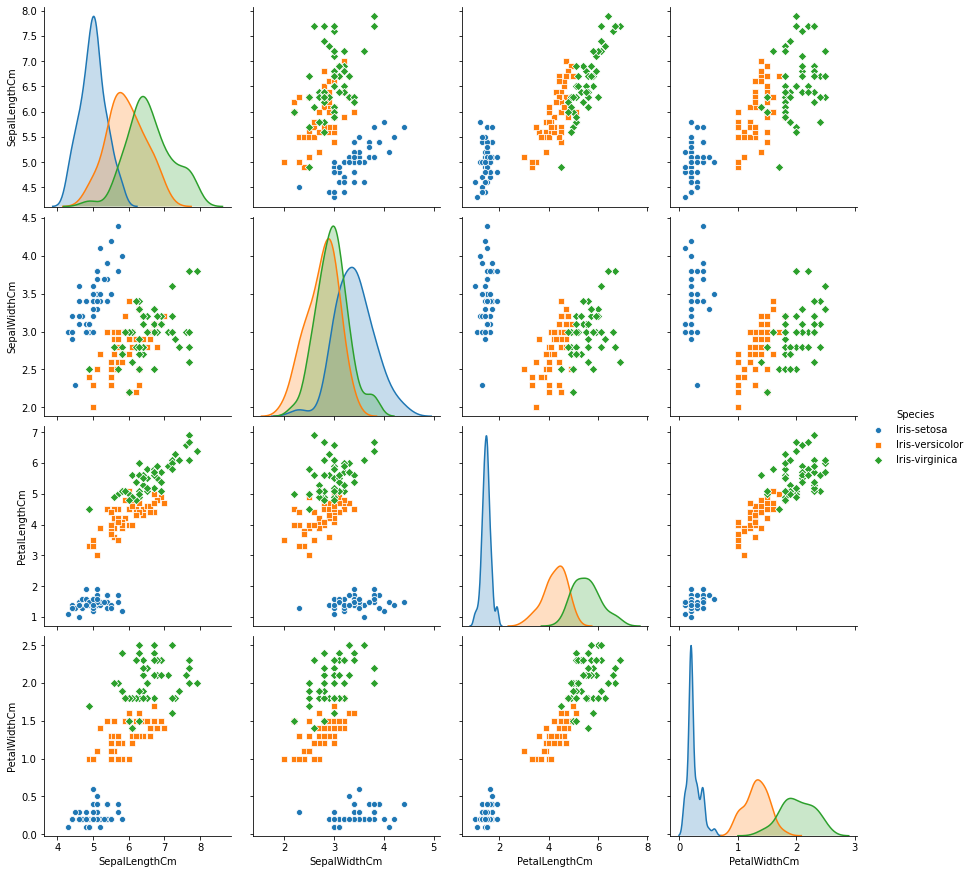

In [165]:
#PAIRPLOT
sns.pairplot(dataset.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])   # Iris.csv
# sns.pairplot(dataset, hue = "Outcome", height=3, markers=["o", "s"])                             # diabetes.csv
plt.show()

<Figure size 432x288 with 0 Axes>

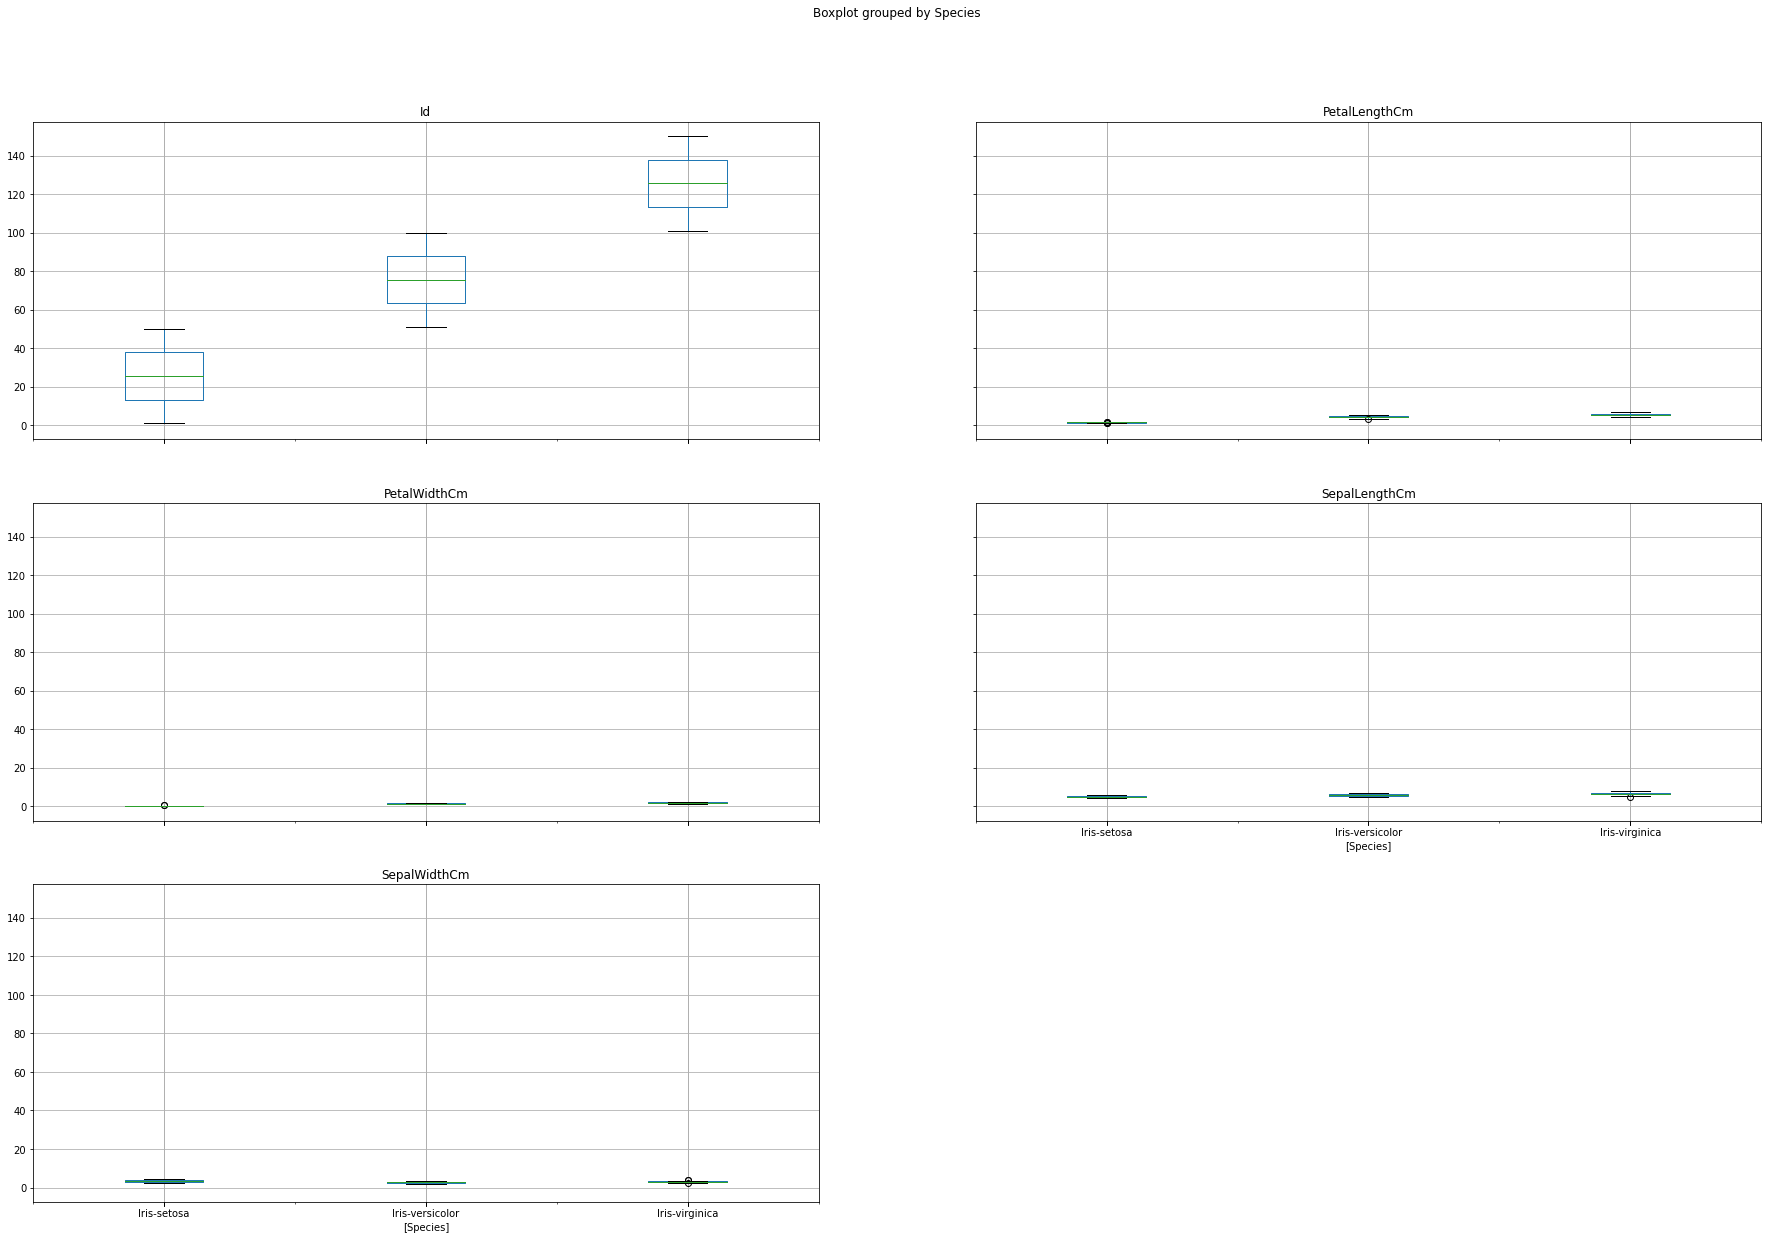

In [166]:
plt.figure()
dataset.boxplot(by="Species", figsize=(30, 20))         # Iris.csv
# dataset.boxplot(by="Outcome", figsize=(30, 20))           # diabetes.csv
plt.show()

### 2: Data preprocessing

In [0]:
# determine features and labels

# Iris.csv
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = dataset[feature_columns].values
y = dataset['Species'].values

# diabetes.csv 
# feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# X = dataset[feature_columns].values
# y = dataset['Outcome'].values


In [0]:
# Labels are categorical variables. Therefore, we have to transform them into a numeric format as KNeighborsClassifier does not accept string labels

# Iris-setosa correspond to 0
# Iris-versicolor correspond to 1
# Iris-virginica correspond to 2
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yl = le.fit_transform(y)

In [169]:
# Spliting dataset into training set and test set
# training set: to build classifier
# test set: to evaluate classifier  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, yl, test_size = 0.2, random_state = 0)
print(X_train.shape) # 80% rows dùng để train
print(y_train.shape)
print(X_test.shape) # 20% rows dùng để test
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


### 3: Using KNN 


In [0]:
# build model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [0]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

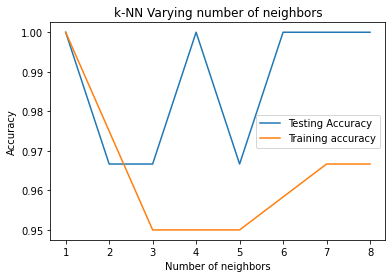

In [172]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show() 

### 4: Evaluating the model for the test set

In [173]:
# model (k = 1)
classifier = KNeighborsClassifier(n_neighbors=1)

# Fitting the model
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [174]:
# Predicting on the test set
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [175]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [176]:
#Option 1
#Sử dụng hàm accuracy_score
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [177]:
# Option 2
acccuracy_byhand = (11+13+6)/(11+13+6+0+0+0+0)         # Iris.csv
# acccuracy_byhand = (74+21)/(74+26+33+21)                 # diabetes.csv
acccuracy_byhand

1.0

In [178]:
#Option 3
classifier.score(X_test, y_test)

1.0

In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

